# Python API to argovis.colorado.edu

The about page of the web app [argovis.colorado.edu](http://argovis.colorado.edu) introduces the web app website and links to other useful information (e.g. FAQs, tutorials). The Argovis tutorials page provides more information about available APIs, along with sample code in different programming languages (e.g. Python, Matlab). Supplementary tutorial videos are found [here](https://www.youtube.com/watch?v=UOjSV4EIy00&list=PLJQE6R74BkyVV3PeTRdGh-W5llAY4XJ8v).

### A short summary of the background and of Argovis' goals:

For the first time in history, the [Argo] (http://www.argo.ucsd.edu/index.html) network of profiling floats provides real-time data of temperature T, salinity S, and pressure P for the global ocean to a depth of 2000 dbar, with Deep Argo floats going down to 6000-dbar depth. Argo floats have been deployed since the early 2000s and reached the expected spatial distribution in 2007 (Roemmich et al. 2009). Nearly 4000 floats are currently operating in the global ocean and provide a profile every 10 days, that is, measurements from a vertical column of the ocean as a single float ascends to the surface. The four-dimensional (4D) space–time Argo data have many scientific and tech- nological advantages, two of which are 1) unprecedented spatial and temporal resolution over the global ocean, and 2) no seasonal bias (Roemmich et al. 2009). More than two million T/S/P profiles have been collected through the Argo Program.

The web app [argovis.colorado.edu](http://argovis.colorado.edu) aims to improve visualization and data retrieval of the Argo dataset. This web app is a maintainable, scalable, and portable tool written with representational state transfer (REST) architecture. RESTful design offers us the opportunity to feature cloud computing applications; chiefly, map comparison from existing gridded Argo products, as well as parameter estimation such as basin mean T/S/P.

Currently, Argovis is expanding to co-locate Argo data with weather events, satellite and other Earth science datasets.

### Citation for the Argovis web app and the Argovis database: 

Tucker, T., D. Giglio, M. Scanderbeg, and S.S.P. Shen, 0: Argovis: A Web Application for Fast Delivery, Visualization, and Analysis of Argo Data. J. Atmos. Oceanic Technol., 37, 401–416, [https://doi.org/10.1175/JTECH-D-19-0041.1] (https://doi.org/10.1175/JTECH-D-19-0041.1)

If using data from Argovis in publicaitons, please cite both the above Argovis web application paper and the original Argo data source reference in your paper:

" These data were collected and made freely available by the International Argo Program and the national programs that contribute to it. (http://www.argo.ucsd.edu, http://argo.jcommops.org). The Argo Program is part of the Global Ocean Observing System. " 
Argo (2000). Argo float data and metadata from Global Data Assembly Centre (Argo GDAC). SEANOE. http://doi.org/10.17882/42182

### Acknowledgements:
Argovis is hosted on a server of the Department of Atmospheric and Oceanic Sciences (ATOC) at the University of Colorado Boulder. Currently, Argovis is funded by the NSF Earthcube program (Award [#1928305](https://nsf.gov/awardsearch/showAward?AWD_ID=1928305&HistoricalAwards=false)).

In the past, Argovis has been funded by (starting with the most recent):

- Giglio's research funds provided by University of Colorado Boulder
- the SOCCOM Project through grant number NSF PLR-1425989
- the US Argo Program through NOAA Grant NA15OAR4320071 (CIMEC)
- the National Oceanic and Atmospheric Administration – Cooperative Science Center for Earth System Sciences and - Remote Sensing Technologies (NOAA-CREST) under the Cooperative Agreement Grant \#: NA16SEC4810008
- the U.S. NOAA Cooperative Institute for Climate Science (Award No. 13342-Z7812001)
- The City College of New York, NOAA-CREST program and NOAA Office of Education, Educational Partnership Program which provided full fellowship support to Tyler Tucker at San Diego State University 

The initial development of Argovis referenced the codes and ideas of the 4-Dimensional Visual Delivery (4DVD) technology developed at the Climate Informatics Lab, San Diego State University. The computer code for 4DVD is at https://github.com/dafrenchyman/4dvd, and is available for download under the GNU General Public License open source license. All applicable restrictions, disclaimers of warranties, and limitations of liability in the GNU General Public License also applies to uses of 4DVD on this website.

### Description of this notebook:
The following code is a way to get ocean data stored on Argovis. HTTP 'get' requests access the web app's database; however, without a browser. Essentially, this interface is used to query the same database that builds the website.

Citation:

Tucker, T., D. Giglio, M. Scanderbeg, and S.S.P. Shen, 0: Argovis: A Web Application for Fast Delivery, Visualization, and Analysis of Argo Data. J. Atmos. Oceanic Technol., 37, 401–416, [https://doi.org/10.1175/JTECH-D-19-0041.1] (https://doi.org/10.1175/JTECH-D-19-0041.1)

This notebook will guide a python user to:

[1. Query a specific profile using its id, designated by its platform (WMO) number with its cycle number, connected by an underscore. For example '3900737_9'](#section_one)

[2. Query a specified platform by number. Example '3900737'.](#section_two)

[3.1 Query profiles within a given shape, date range, and pressure range.](#section_three)

[3.2 Query profiles position, date, and cycle number within month and year (globally).](#section_three_two)

[4. Plot query results](#section_four)

[5. Create time series for a selected region and set of dates.](#section_five)

[6. Query database using a gridded scheme](#section_six)

[7. Overlay Atmospheric Rivers on the map](#section_seven)

Firstly, following libraries are called and styles are set.

In [1]:
import requests
import numpy as np
import pandas as pd

import cmocean
import matplotlib.pylab as plt
from scipy.interpolate import griddata
from scipy import interpolate
from datetime import datetime
import pdb
import os
import csv

from datetime import datetime, timedelta
import calendar

import matplotlib
matplotlib.font_manager._rebuild()

#used for map projections
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

%matplotlib inline

#sets plot styles
import seaborn as sns
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.ticker as mtick
rc('text', usetex=False)
rcStyle = {"font.size": 10,
           "axes.titlesize": 20,
           "axes.labelsize": 20,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16}
sns.set_context("paper", rc=rcStyle)
sns.set_style("whitegrid", {'axes.grid' : False})
myColors = ["windows blue", "amber", "dusty rose", "prussian blue", "faded green", "dusty purple", "gold", "dark pink", "green", "red", "brown"]
colorsBW = ["black", "grey"]
sns.set_palette(sns.xkcd_palette(myColors))

curDir = os.getcwd()
dataDir = os.path.join(curDir, 'data')

if not os.path.exists(dataDir):
    os.mkdir(dataDir)

<a name="section_one"/> </a>
# 1. Get A Profile

The requests library handles the HTTP getting and receiving. If the message is received and the profile exists Argovis will return a JSON object. Python casts a JSON object as a native dictionary type. 

in this example we are going to access the profile from float 3900737 cycle 279. The function below builds the following url, requests json data, and returns it in python.

[https://argovis.colorado.edu/catalog/profiles/3900737_279](https://argovis.colorado.edu/catalog/profiles/3900737_279)

In [2]:
def get_profile(profile_number):
    url = 'https://argovis.colorado.edu/catalog/profiles/{}'.format(profile_number)
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    profile = resp.json()
    return profile

In [3]:
profileDict = get_profile('3900737_279')

profileDict is a set of key:value pairs enclosed by curly brackets. These are profile objects stored in the Argovis Database, inported in a Python environment. We expose the keys with the command `profileDict.keys()`

In [4]:
profileDict.keys()

dict_keys(['bgcMeasKeys', 'station_parameters', 'station_parameters_in_nc', 'PARAMETER_DATA_MODE', '_id', 'POSITIONING_SYSTEM', 'DATA_CENTRE', 'PI_NAME', 'WMO_INST_TYPE', 'VERTICAL_SAMPLING_SCHEME', 'DATA_MODE', 'PLATFORM_TYPE', 'measurements', 'pres_max_for_TEMP', 'pres_min_for_TEMP', 'pres_max_for_PSAL', 'pres_min_for_PSAL', 'max_pres', 'date', 'date_added', 'date_qc', 'lat', 'lon', 'geoLocation', 'position_qc', 'cycle_number', 'dac', 'platform_number', 'nc_url', 'DIRECTION', 'BASIN', 'bgcMeas', 'url', 'core_data_mode', 'jcommopsPlatform', 'euroargoPlatform', 'formatted_station_parameters', 'roundLat', 'roundLon', 'strLat', 'strLon', 'date_formatted', 'id'])

Core measuremenent data is stored in the field 'measurements'. Its a list of dictionary objects, indexed by pressure. Each row is a pressure level and each key is a column. We can convert this tabular like data into a pandas dataframe. Essentially it is a spreadsheet table.

In [5]:
profileDict = get_profile('3900737_279')
profileDf = pd.DataFrame(profileDict['measurements'])
profileDf['cycle_number'] = profileDict['cycle_number']
profileDf['profile_id'] = profileDict['_id']
profileDf.head()

,temp,psal,pres,cycle_number,profile_id
0,27.165,35.421,4.4,279,3900737_279
1,27.063,35.421,10.0,279,3900737_279
2,27.055,35.422,16.9,279,3900737_279
3,27.048,35.422,23.7,279,3900737_279
4,27.046,35.421,30.9,279,3900737_279


With the data in this form, we can plot it with our favorite library, matplotlib. Try different styles.

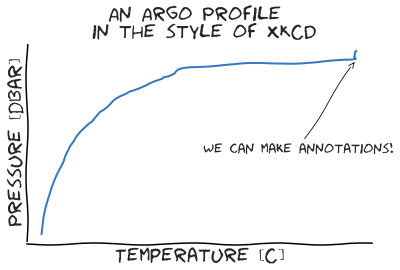

In [6]:
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

    dataX = profileDf.pres.values
    dataY = profileDf.temp.values
    ax.plot(dataY, dataX)

    ax.set_title('An Argo Profile \n in the style of XKCD')
    ax.set_xlabel('Temperature [C]')
    ax.set_ylabel('Pressure [dbar]')
    
    ax.annotate(
    'We can make annotations!',
    xy=(dataY[12], dataX[12]+10), \
        arrowprops=dict( color='k', arrowstyle='->'), xytext=(15, 1100))

<a name="section_two"/> </a>
# 2. Get A Platform

A platform consists of a list of profiles. An additional function 'parse_into_df' appends each profile to one data frame.

In this example we are constructing the url:
[https://argovis.colorado.edu/catalog/platforms/3900737](https://argovis.colorado.edu/catalog/platforms/3900737)

In [10]:
def get_platform_profiles(platform_number):
    url = 'https://argovis.colorado.edu/catalog/platforms/{}'.format(platform_number)
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    platformProfiles = resp.json()
    return platformProfiles

def parse_into_df(profiles):
    meas_keys = profiles[0]['measurements'][0].keys()
    df = pd.DataFrame(columns=meas_keys)
    for profile in profiles:
        profileDf = pd.DataFrame(profile['measurements'])
        profileDf['cycle_number'] = profile['cycle_number']
        profileDf['profile_id'] = profile['_id']
        profileDf['lat'] = profile['lat']
        profileDf['lon'] = profile['lon']
        profileDf['date'] = profile['date']
        df = pd.concat([df, profileDf], sort=False)
    return df

In [11]:
platformProfiles = get_platform_profiles('3900737')#('5904684')
platformDf = parse_into_df(platformProfiles)
print('number of measurements {}'.format(platformDf.shape[0]))

number of measurements 25609


In [12]:
platformDf.head()

,temp,psal,pres,cycle_number,profile_id,lat,lon,date
0,26.349,33.770,4.4,1.0,3900737_1,0.931,-84.083,2009-06-15T11:13:53.000Z
1,26.356,33.781,10.5,1.0,3900737_1,0.931,-84.083,2009-06-15T11:13:53.000Z
2,26.294,33.894,17.7,1.0,3900737_1,0.931,-84.083,2009-06-15T11:13:53.000Z
3,26.014,34.198,24.6,1.0,3900737_1,0.931,-84.083,2009-06-15T11:13:53.000Z
4,24.573,34.716,31.6,1.0,3900737_1,0.931,-84.083,2009-06-15T11:13:53.000Z


By the way, Pandas dataframes can handle large arrays efficiently, thanks to the underlying numpy library. Pandas allows for easy and quick computations, such as taking the mean of the measurements.

In [13]:
platformDf[['pres', 'psal', 'temp']].mean(0)

pres    539.346652
psal     34.905583
temp     12.602862
dtype: float64

Next we shall plot these profiles' temperature at a level of interest. The function below calculates a linear interpolation of temperature and salinity.         # Note that some of the profiles in Argovis may not have salinity (either because there is no salinity value in the original Argo file or the quality is bad)

A simple script then plots a scatter chart with the color set to temperature. Let's also use the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library for base layers and projections.

In [14]:
def parse_into_df_plev(profiles, plev):
    plevProfileList = []
    for profile in profiles:
        profileDf_bfr = pd.DataFrame(profile['measurements'])
        plevProfile = profile
        fT = interpolate.interp1d(profileDf_bfr['pres'], profileDf_bfr['temp'], bounds_error=False)
        plevProfile['temp'] = fT(plev)
        # some of the profiles in Argovis may not have salinity 
        # (either because there is no salinity value in the original Argo file or the quality is bad)
        try:
            fS = interpolate.interp1d(profileDf_bfr['pres'], profileDf_bfr['psal'], bounds_error=False)
            plevProfile['psal'] = fS(plev)
        except:
            plevProfile['psal'] = np.nan #  No salinity found in profile
        plevProfile['pres'] = plev
        plevProfileList.append(plevProfile)
    df = pd.DataFrame(plevProfileList)
    df = df.sort_values(by=['cycle_number'])
    df = df[['cycle_number','_id','date','lon','lat','pres','temp','psal']]
    return df

In [15]:
def plot_pmesh(df, measName, figsize=(16,24), shrinkcbar=.1, \
               delta_lon=10, delta_lat=10, map_proj=ccrs.PlateCarree(), \
               xlims=None):
    fig = plt.figure(figsize=figsize)
    x = df['lon'].values
    y = df['lat'].values
    points = map_proj.transform_points(ccrs.Geodetic(), x, y)
    x = points[:, 0]
    y = points[:, 1]

    z = df[measName].values
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually
    ax = plt.axes(projection=map_proj, xlabel='long', ylabel='lats')
    plt.title(measName + ' on a map')
    
    sct = plt.scatter(x, y, c=z, s=15, cmap=cmocean.cm.dense,zorder=3)
    cbar = fig.colorbar(sct, cmap=cmocean.cm.dense, shrink=shrinkcbar)
     
    if not xlims:
        xlims = [df['lon'].max() + delta_lon, df['lon'].min()- delta_lon]

    ax.set_xlim(min(xlims), max(xlims))
    ax.set_ylim(min(df['lat']) - delta_lat, max(df['lat']) + delta_lat)
    
    ax.coastlines(zorder=1)
    ax.stock_img()
    ax.gridlines()
    return fig

In [16]:
plevIntp = 20
platformDf_plev = parse_into_df_plev(platformProfiles, plevIntp)
platformDf_plev.head()

,cycle_number,_id,date,lon,lat,pres,temp,psal
0,1,3900737_1,2009-06-15T11:13:53.000Z,-84.083000,0.931,20,26.200666666666667,33.995333333333335
111,2,3900737_2,2009-06-26T07:03:40.999Z,-84.698997,1.070,20,26.89818918918919,33.319783783783784
220,3,3900737_3,2009-07-06T23:34:37.001Z,-85.484001,0.789,20,26.35662162162162,33.82286486486487
288,4,3900737_4,2009-07-17T23:01:22.998Z,-86.365997,0.333,20,25.8478,33.88562666666667
299,5,3900737_5,2009-07-28T15:05:59.000Z,-87.029999,0.245,20,26.111179104477614,33.86576119402985


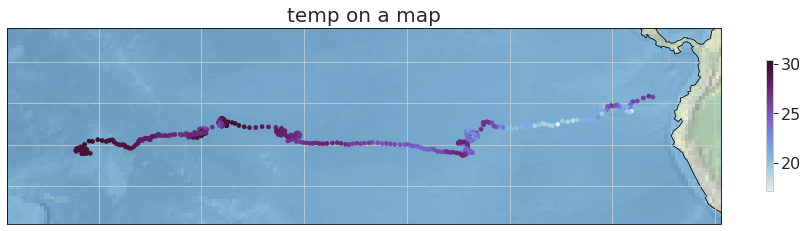

In [17]:
pmeshfig = plot_pmesh(platformDf_plev,'temp')
plt.show()

<a name="section_three"/> </a>
# 3.1 Get A Space-Time Selection

This query retrieves profiles within a given shape, date range, and optional depth range.

[This region's](https://argovis.colorado.edu/selection/profiles/page?startDate=2017-9-15&endDate=2017-10-31&shape=[[[-18.6,31.7],[-18.6,37.7],[-5.9,37.7],[-5.9,31.7],[-18.6,31.7]]]&presRange=[0,30]) data will be queried and plotted in Python.

* start date: string formatted as 'YYYY-MM-DD'
* end date: string formatted as 'YYYY-MM-DD'
* pressure range (optional): string formatted as '[lowerPressure,upperPressure]'. No Spaces!
* shape: a list of lists containing [lng,lat] coordinates. 

It is worth mentioning some information regarding how profiles are stored in Argovis. First, know that latitude lines drawn on a map typically appear to be the shortist distance. Indeed this would be the case on a flat plane; however, for a spherical-like objects like the Earth, Geodesic lines are shorter. Argovis indexes its coordinates on a sphere, thus takes spherical geometry when making spatial selections. Not only does this allow a more accurate representation of how a shape on a map behaves, it also allows us to query profiles that fall in shapes that cross the antimeridian.

We can see an example of shape in the yellow region below.

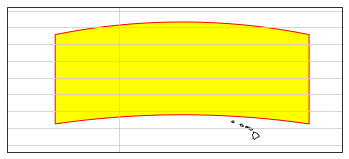

In [18]:
shape = [[[168.6,21.7],[168.6,37.7],[-145.9,37.7],[-145.9,21.7],[168.6,21.7]]]
lat_corners = np.array([lnglat[1] for lnglat in shape[0]])
lon_corners = np.array([lnglat[0] for lnglat in shape[0]])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners[::-1]
poly_corners[:,1] = lat_corners[::-1]
delta = 5
poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Geodetic())
central_longitude = -180
map_proj = ccrs.PlateCarree(central_longitude=central_longitude)
map_proj._threshold /= 100.  # the default values is bad, users need to set them manually

ax = plt.subplot(1, 1, 1, projection=map_proj)
#ax.set_global()
ax.add_patch(poly)
ax.gridlines()
ax.coastlines()
ax.set_ylim(lat_corners.min() - delta, lat_corners.max() + delta)
xrange = [lon_corners.min() - delta, lon_corners.max() + delta]
ax.set_xlim(-20, 40)
plt.show()

We should expect profiles made using the function `get_selection_profiles()` to fall within this region.

In [64]:
def get_selection_profiles(startDate, endDate, shape, presRange=None, printUrl=True):
    url = 'https://argovis.colorado.edu/selection/profiles'
    url += '?startDate={}'.format(startDate)
    url += '&endDate={}'.format(endDate)
    url += '&shape={}'.format(shape)
    if presRange:
        pressRangeQuery = '&presRange=' + presRange
        url += pressRangeQuery
    if printUrl:
        print(url)
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    selectionProfiles = resp.json()
    return selectionProfiles

In [65]:
startDate='2017-9-15'
endDate='2017-9-30'
strShape = str(shape).replace(' ', '')
presRange='[0,50]'
selectionProfiles = get_selection_profiles(startDate, endDate, strShape, presRange)
selectionProfiles_raw = selectionProfiles
if len(selectionProfiles) > 0:
    selectionDf = parse_into_df(selectionProfiles)
selectionDf.replace(-999, np.nan, inplace=True)

https://argovis.colorado.edu/selection/profiles?startDate=2017-9-15&endDate=2017-9-30&shape=[[[-65,20],[-65,25],[-60,25],[-60,20],[-65,20]]]&presRange=[0,50]


As we did with the platform page, we interpolate the profiles to a pressure level of interest and plot the values.

In [21]:
selectionDf_plev = parse_into_df_plev(selectionProfiles_raw, plevIntp)
selectionDf_plev.head()

,cycle_number,_id,date,lon,lat,pres,temp,psal
147,1,5905137_1,2017-09-20T14:17:14.001Z,-158.0020,38.0210,20,19.72884,33.58356
136,1,5905060_1,2017-09-21T12:04:44.999Z,169.9325,23.0209,20,29.251,35.08
65,2,5905060_2,2017-09-25T17:00:17.999Z,169.8303,22.9688,20,29.40672,35.11416
146,2,5905137_2,2017-09-20T16:53:13.001Z,-158.0000,38.0170,20,20.39128,33.647920000000006
2,3,5905060_3,2017-09-29T21:53:56.999Z,169.7212,22.9206,20,29.537879999999998,35.152519999999996


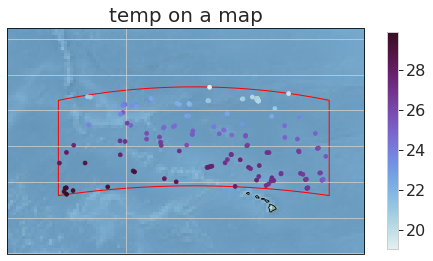

In [22]:
pmeshfig = plot_pmesh(selectionDf_plev,'temp', (8, 8), .5, 10, 10, map_proj, [-20, 40])
ax = pmeshfig.get_axes()[0]
poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=False, lw=1, transform=ccrs.Geodetic())
ax.add_patch(poly)
plt.show()



<a name="section_three_two"/> </a>
## 3.2 Metadata selection for month and year

For profile metadata, data can be accessed quickly with the following API.

In [34]:
def get_monthly_profile_pos(month, year):
    url = 'https://argovis.colorado.edu/selection/profiles'
    url += '/{0}/{1}'.format(month, year)
    resp = requests.get(url)
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    monthlyProfilePos = resp.json()
    return monthlyProfilePos

month = 1 # January
year = 2019 # Year 2019
monthlyProfilePos = get_monthly_profile_pos(month, year)
monthlyDf = pd.DataFrame(monthlyProfilePos)

In [33]:
monthlyDf[['_id', 'date', 'POSITIONING_SYSTEM', 'DATA_MODE', \
           'dac', 'PLATFORM_TYPE', 'lat', 'lon']].head()

,_id,date,POSITIONING_SYSTEM,DATA_MODE,dac,PLATFORM_TYPE,lat,lon
0,5904229_226,2019-01-31T23:58:35.000Z,GPS,D,csiro,APEX,-64.13300,-108.81600
1,2902585_166,2019-01-31T23:57:33.999Z,ARGOS,A,csio,PROVOR,43.36300,139.44400
2,5905234_39D,2019-01-31T23:56:48.192Z,GPS,D,aoml,SOLO_D,-44.05055,-148.28209
3,5902387_140,2019-01-31T23:49:51.744Z,GPS,D,aoml,SOLO_II,-43.89198,153.50472
4,5904899_157,2019-01-31T23:46:43.000Z,GPS,D,csiro,APEX,-44.96800,106.87900


### Gathering metadata globally in a period of interest

We can loop over months, saving the results as csv files.

In [45]:
def progress_ind(idx, maxIdx):
    print('{} percent complete'.format(100*round(idx/maxIdx, 3)), end='\r')

def make_grouped_meta_data(dataDir, dateRange):
    profTimeSeries = []
    typeTimeSeries = []
    psTimeSeries = []
    dacTimeSeries = []
    maxIdx = len(dateRange)
    for idx, date in enumerate(dateRange):
        progress_ind(idx, maxIdx)
        month = date.to_pydatetime().month
        year = date.to_pydatetime().year
        monthlyProfilePos = get_monthly_profile_pos(month, year)
        monthlyDf = pd.DataFrame(monthlyProfilePos)
        monthDict = {'date': date, 'nProf': len(monthlyProfilePos)}

        allDict = {}
        allDict.update(monthDict)

        platformType = monthlyDf.groupby('PLATFORM_TYPE')['_id'].count().to_dict()
        platformType.update(monthDict)
        typeTimeSeries.append(platformType)
        allDict.update(platformType)

        ps = monthlyDf.groupby('POSITIONING_SYSTEM')['_id'].count().to_dict()
        ps.update(monthDict)
        psTimeSeries.append(ps)
        allDict.update(ps)

        dac = monthlyDf.groupby('dac')['_id'].count().to_dict()
        dac.update(monthDict)
        dacTimeSeries.append(dac)
        allDict.update(dac)

        profTimeSeries.append(allDict)
    progress_ind(maxIdx, maxIdx)
    save_metadata_time_series(dataDir, 'groupedProfileTimeSeries.csv', profTimeSeries)
    save_metadata_time_series(dataDir, 'groupedProfilePositioningSystemTimeSeries.csv', psTimeSeries)
    save_metadata_time_series(dataDir, 'groupedProfileTypeTimeSeries.csv', typeTimeSeries)
    save_metadata_time_series(dataDir, 'groupedDacTimeSeries.csv', dacTimeSeries) 

def save_metadata_time_series(dataDir, filename, metadataDict):
    filename = os.path.join(dataDir, filename)
    df = pd.DataFrame(metadataDict)
    df.to_csv(filename, index=False)
    
def get_grouped_metadata(dataDir, filename):
    df = pd.read_csv(os.path.join(dataDir,filename))
    df['date'] = pd.to_datetime(df['date'])
    return df

In [46]:
dateRange = pd.date_range('2015-01-01', '2016-06-01', periods=None, freq='M')
make_grouped_meta_data(dataDir, dateRange)

In [47]:
profTimeSeriesDf = get_grouped_metadata(dataDir, 'groupedProfileTimeSeries.csv')
psTimeSeriesDf = get_grouped_metadata(dataDir, 'groupedProfilePositioningSystemTimeSeries.csv')
typeTimeSeriesDf = get_grouped_metadata(dataDir, 'groupedProfileTypeTimeSeries.csv')
dacTimeSeriesDf = get_grouped_metadata(dataDir, 'groupedDacTimeSeries.csv')

In [48]:
dacTimeSeriesDf.head()

,aoml,bodc,coriolis,csio,csiro,incois,jma,kma,kordi,meds,nmdis,date,nProf
0,7332,529,2055,833,1062,376,731,109,22,146,34.0,2015-01-31,13229
1,6846,497,1944,762,993,575,684,71,23,127,31.0,2015-02-28,12553
2,7389,556,2134,837,1070,440,787,86,19,139,34.0,2015-03-31,13491
3,7227,535,2149,804,1033,396,850,86,21,141,29.0,2015-04-30,13271
4,7752,541,2499,708,1058,408,945,76,22,154,28.0,2015-05-31,14191


<a name="section_four"/> </a>
# 4. Plotting metadata results

Argovis's plotting capabilities are limited to what is coded in JavaScript. There are many plotting libraries out there, but in this example we can create plots on our machine, thereby allowing customization.

We just made some dataframes containing profile metadata. We can plot these time series with the following function.

In [49]:
def make_stack_plot(df, figsize=(6,3)):
    dataDf = df.drop(['date', 'nProf'], axis=1)
    fig = plt.figure(figsize=figsize)
    axes = plt.axes()
    axes.set_title('Number of profiles per month vs. time')
    axes.set_ylabel('# profiles/month')
    axes.set_xlabel('Date')
    axes.stackplot(df['date'].values, dataDf.T, labels=dataDf.columns)
    axes.legend(loc=2, fontsize=16)
    return fig

<ipython-input-50-2368b8b1eb7e>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


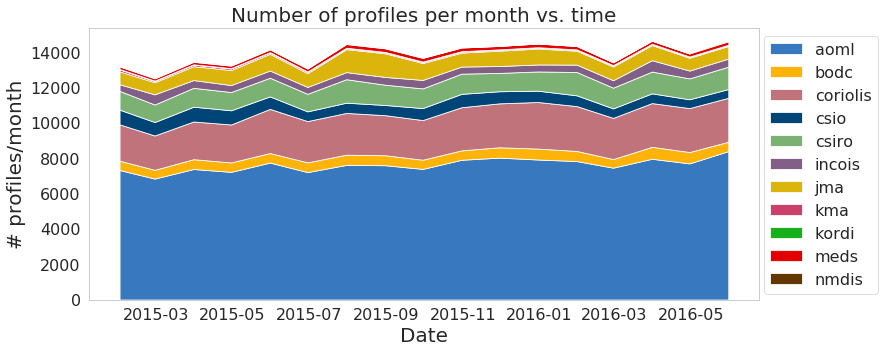

In [50]:
fig = make_stack_plot(dacTimeSeriesDf, figsize=(12,5))
axes = plt.axes()
axes.legend(bbox_to_anchor=(1.19, 1.00), fontsize=16)

Here we can see which dacs are producing results over time. The next plot shows which transmission system the profiles are using. I lumped GPS into Iridium. They are essentially equivalent.

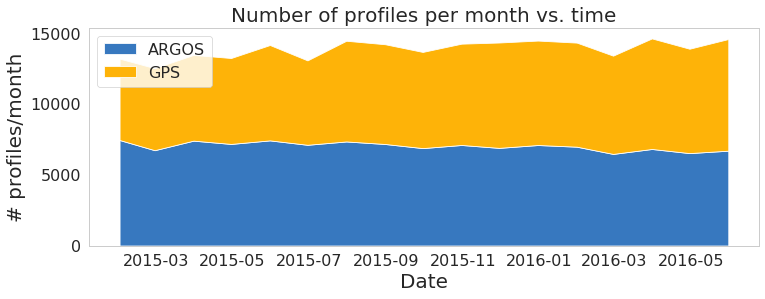

In [51]:
psdf=psTimeSeriesDf.copy()
if 'IRIDIUM' in psTimeSeriesDf:
    psdf['IRIDIUM'] = psTimeSeriesDf['GPS'] + psTimeSeriesDf['IRIDIUM']
    psdf.drop('GPS', axis = 1, inplace=True)
fig = make_stack_plot(psdf, figsize=(12,4))

<a name="section_five"/> </a>
# 5. Time series for the average of the data in a region (interpolated on pressure levels of interest)

We build a time series by stacking selection queries on top of each other. In this example, we average interpolated temperature data from profiles in a region of interest in monthly aggregates. We starting with January in `startYear` and ending in December of `endYear`. 

In other words, we are using `get_selection_profiles` from [#section_three](section 3.1). and taking the mean of all the points of a given month. Note that we ought to take a _spatially_ averaged mean if we were to put this into practice.

In [52]:
def get_month_day_range(date):
    '''gets first day and last day of the month a given month-year datetime object'''
    first_day = date.replace(day=1)
    last_day = date.replace(day=calendar.monthrange(date.year, date.month)[1])
    return first_day, last_day

# set region and pressure range of interest
shape = '[[[-65,20],[-65,25],[-60,25],[-60,20],[-65,20]]]'
presRange ='[0,50]'
startYear = 2019
endYear = 2020

In [121]:
def time_series(shape, presRange, startYear=2019, endYear=2020, plevIntp=(20)):
    tempMean = []
    times = []
    yearRange = range(startYear,endYear+1)
    maxYdx = len(yearRange)
    for ydx, yy in enumerate(yearRange):
        progress_ind(ydx, maxYdx)
        monthRange = range(1,13)
        for mm in monthRange:
            times.append(datetime(yy, mm, 15))
            [startDate, endDate] = get_month_day_range(datetime(yy, mm, 15))
            profiles = get_selection_profiles(startDate, endDate, shape, presRange, printUrl=False)
            #pdb.set_trace()
            if len(profiles) > 0:
                df = parse_into_df_plev(profiles, plevIntp)
                df = df.dropna(subset=['temp'])
                mean = df['temp'].mean()
                tempMean.append(mean)
            else:
                tempMean.append(np.nan)
    progress_ind(maxYdx, maxYdx)
    return tempMean, times

tempMean, times = time_series(shape, presRange, startYear, endYear, plevIntp)

> <ipython-input-121-a4d3166a4495>(12)time_series()
-> [startDate, endDate] = get_month_day_range(datetime(yy, mm, 15))


(Pdb)  n


> <ipython-input-121-a4d3166a4495>(13)time_series()
-> profiles = get_selection_profiles(startDate, endDate, shape, presRange, printUrl=False)


(Pdb)  startDate


datetime.datetime(2019, 1, 1, 0, 0)


(Pdb)  endDate


datetime.datetime(2019, 1, 31, 0, 0)


(Pdb)  q


BdbQuit: 

Once again, we save our output to a csv.

In [109]:
filename = os.path.join(dataDir, 'time_series.csv')
strTimes = [datetime.strftime(t, '%Y-%m-%d') for t in times]
with open(filename, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(('date', 'tempMean'))
    wr.writerows(zip(strTimes, tempMean))

In [114]:
tsdf = pd.read_csv(filename)
tsdf['date'] = tsdf['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))

Text(0.5, 0, 'date')

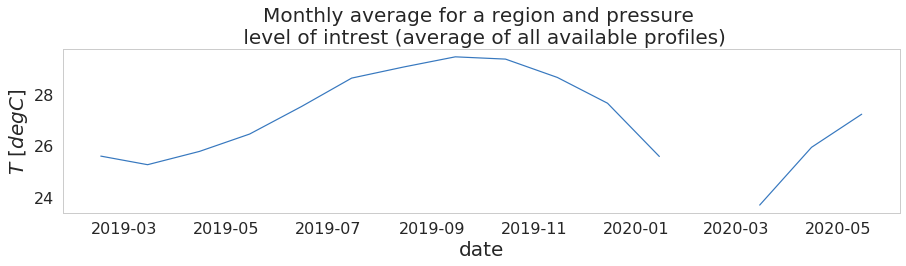

In [120]:
fig = plt.figure(999, figsize=(15,3))
ax = plt.axes()
ax.plot(tsdf['date'], tsdf['tempMean'])
ax.set_title('Monthly average for a region and pressure \n level of intrest (average of all available profiles)')
ax.set_ylabel('$T\ [degC]$')
ax.set_xlabel('date')

Large aggregations such as those seen in this section require multiple queries. The database that stores profiles can at most return 16MB for one query. Users attempting to query over too large an area or time range will recieve an error message instead of the expected JSON. Hence, we segmented the routine in a loop, where each month/year is queried at one time. 

<a name="section_six"/> </a>
# 6. Query globally within thin slice of pressure

In this section, we query all the data globally within a very short time period and for a pressure range of interest. How small a query? Consider the following as boiler plate:
- Pressure range is no more than 50 dbar
- Date range is no more than 3 days
This will ensure that JSON is returned instead of an unexpected error message.

We then interpolate each profile to a pressure level of interest and plot the temperature using our `plot_pmesh()` function back from [section 2](#section_two).

In [124]:
def get_ocean_slice(startDate, endDate, presRange='[5,15]'):
    '''
    query horizontal slice of ocean for a specified time range
    startDate and endDate should be a string formated like so: 'YYYY-MM-DD'
    presRange should comprise of a string formatted to be: '[lowPres,highPres]'
    Try to make the query small enough so as to not pass the 16 MB limit set by the database.
    '''
    baseURL = 'https://argovis.colorado.edu/gridding/presSlice/'
    startDateQuery = '?startDate=' + startDate
    endDateQuery = '&endDate=' + endDate
    presRangeQuery = '&presRange=' + presRange
    url = baseURL + startDateQuery + endDateQuery + presRangeQuery
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    profiles = resp.json()
    return profiles

In [125]:
presRange = '[0, 50]' #  used to query database
date = datetime(2010, 1, 1, 0, 0, 0) # this date will be used later for ARs
startDate='2010-1-1'
endDate='2010-1-2'
sliceProfiles = get_ocean_slice(startDate, endDate, presRange)
sliceDf = parse_into_df_plev(sliceProfiles, plevIntp)
sliceDf.head()

,cycle_number,_id,date,lon,lat,pres,temp,psal
67,0,1901426_0,2010-01-01T15:47:12.192Z,42.499,-29.988,20,24.323666666666668,35.338166666666666
238,1,1900870_1,2010-01-01T03:08:44.000Z,64.854,-30.061,20,22.404916666666665,35.46291666666667
255,1,1901400_1,2010-01-01T01:33:58.000Z,47.850,-29.065,20,22.962849462365593,35.467666666666666
51,1,5903310_1,2010-01-01T18:14:36.095Z,80.669,-23.328,20,24.52,35.384
63,1,5901928_1,2010-01-01T16:39:14.999Z,99.993,-23.271,20,23.011072727272726,35.29003636363636


/opt/conda/envs/av_py_env/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


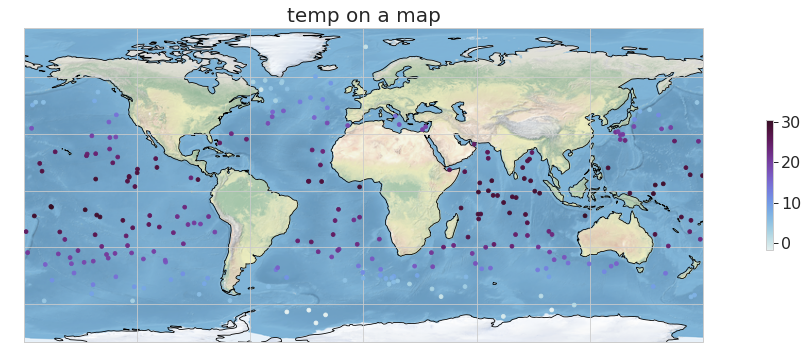

In [30]:
pmeshfig = plot_pmesh(sliceDf,'temp')
plt.show()

Taking a step back, we can see a number of possibilities of using this API such as:
- Generate a global/regional daily state of the ocean, generated with a simple function call. 
- Track a single platform over the course of its history. 
- Make historical time series for a region.

In addition to these items, Argovis is a tool for incorporating other data sets. A recent interest of Argovis is to include data other than Argo, I.E. hurricane track data or satalite data. Even data generated from computer simulation or statistical mapping can be compared to argo profiles.

While still in its infancy, we have added some tools and features in the form of modules that explore the interaction between different data. One such module is mentioned in the next section. 

<a name="section_seven"/> </a>
# 7. Overlay Atmospheric Rivers on the map

Atmospheric rivers (AR) are bodies of moisture in the atmosphere. They are responsible for localized heavy rainfall such as the Pineapple express on the west coast of North America. Argovis has recently included an AR data set taken from by [Guan and Walister](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015JD024257). The dataset is comprised of shapes representing atmospheric rivers at a given time. Argovis charts these shapes and uses them to query for profiles. The module is located [Here](https://argovis.colorado.edu/ng/ar).

The following code shall query atmospheric rivers, and co-locate them with argo profiles.

In [126]:
def get_ar_by_date(date):
    url = "https://argovis.colorado.edu/arShapes/findByDate?date="
    url += date
    resp = requests.get(url)
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    ars = resp.json()
    return ars

def format_ars(ars):
    for ar in ars:
        coords = ar['geoLocation']['coordinates']
        del ar['geoLocation']
        longs, lats = list(zip(*coords))
        ar['coords'] = coords
        ar['longs'] = list(longs)
        ar['lats'] = list(lats)
    return ars

format_date_api = lambda date: datetime.strftime(date, "%Y-%m-%dT%H:%M:%SZ")
stringify_array = lambda arr: str(arr).replace(' ', '')

In [127]:
dateStr = format_date_api(date)
ars = get_ar_by_date(dateStr)
ars = format_ars(ars)
arDf = pd.DataFrame(ars)

In [128]:
presRange='[0,30]'
startDate = format_date_api(date - timedelta(days=3))
endDate = format_date_api(date + timedelta(days=3))
ar = arDf.iloc[2]
coords = list(zip(ar.longs,ar.lats))
coords = [list(elem) for elem in coords]
shape = stringify_array([coords])

The following chart takes one AR shape queried from Argovis, and plots it with our slice query from [section six](#section_six)

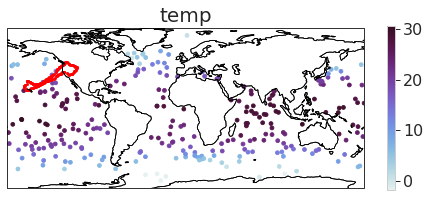

In [129]:
def plot_ar_over_profile_map(df,var,ar):
    fig = plt.figure(figsize=(8,12))
    x = df['lon'].values
    y = df['lat'].values
    z = df[var].values
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    plt.title(var)

    ax.coastlines(zorder=1)
    
    ax.coastlines(zorder=1)
    sct = plt.scatter(x, y, c=z,s=15, cmap=cmocean.cm.dense,zorder=0)
    cbar = fig.colorbar(sct, cmap=cmocean.cm.dense, shrink=.25)

    ARy, ARx = ar.lats, ar.longs
    plt.scatter(ARx,ARy,marker='o',c='r',s=5)
    
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
    
    return fig

plot_ar_over_profile_map(sliceDf,'temp',ar)
plt.show()

Going even further, we can take AR shapes and make profile selections with them.

In [35]:
profiles = get_selection_profiles(startDate, endDate, shape, presRange)
profileDf = parse_into_df(profiles)
pdf = profileDf.drop_duplicates(subset='profile_id')
pdf.head()

https://argovis.colorado.edu/selection/profiles?startDate=2009-12-29T00:00:00Z&endDate=2010-01-04T00:00:00Z&shape=[[[-115.625,37],[-118.125,36],[-118.75,37],[-119.375,38],[-122.5,39.5],[-123.125,39.5],[-124.375,39],[-125,38.5],[-125.625,38],[-126.25,37.5],[-126.875,37],[-127.5,37],[-128.75,36.5],[-129.375,36],[-130,35.5],[-130.625,35],[-131.875,33],[-133.125,32.5],[-134.375,32],[-135.625,31.5],[-136.25,31],[-136.875,31],[-137.5,31],[-138.75,30.5],[-139.375,30],[-140,30],[-140.625,30],[-141.875,29.5],[-142.5,29],[-143.125,28.5],[-143.75,28],[-145,27.5],[-146.25,27],[-146.875,26.5],[-148.125,26],[-148.75,25.5],[-149.375,25],[-150.625,24.5],[-151.875,24],[-152.5,24],[-153.75,23.5],[-154.375,23.5],[-155.625,23],[-156.875,22],[-157.5,21.5],[-158.125,21.5],[-159.375,21.5],[-160,21.5],[-160.625,21.5],[-161.25,21.5],[-162.5,23],[-163.125,24],[-163.125,24.5],[-163.125,25],[-163.125,25.5],[-162.5,26],[-161.875,26.5],[-160,27.5],[-160,30],[-160,30.5],[-159.375,30.5],[-158.75,30.5],[-157.5,29.5],[

,pres,psal,temp,cycle_number,profile_id,lat,lon,date
0,5.5,35.392,21.512,97.0,5901759_97,27.448,-145.995,2010-01-02T19:31:48.000Z
0,5.7,35.511,22.681,122.0,5901336_122,25.165,-158.639,2010-01-02T12:35:27.000Z
0,5.5,35.488,22.040,97.0,5901757_97,25.868,-154.894,2010-01-02T02:22:05.088Z
0,5.5,35.448,21.640,97.0,5901756_97,26.966,-148.599,2010-01-02T00:39:58.464Z
0,5.5,34.832,19.976,46.0,5902210_46,28.997,-143.873,2010-01-01T21:54:46.656Z


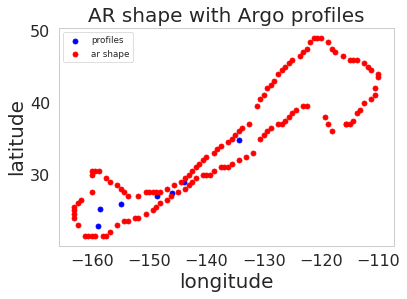

In [36]:
def plot_profiles_and_ar(pdf, ar):
    fig = plt.figure()
    axes = plt.axes()
    py, px = pdf.lat.values, pdf.lon.values
    ay, ax = ar.lats, ar.longs
    axes.scatter(px,py,marker='o',c='b',s=25)
    axes.scatter(ax,ay,marker='o',c='r',s=25)
    axes.set_title('AR shape with Argo profiles')
    axes.set_ylabel('latitude')
    axes.set_xlabel('longitude')
    axes.legend(['profiles', 'ar shape'])
    return fig

fig1 = plot_profiles_and_ar(pdf, ar)

We believe that this will be helpful in the future 

# Conclusion

The main functions described in this notebook can be written in a number or languages, such as R or Matlab. Some Matlab scripts can be found in the tutorial page of the web app. This project is still new, and will continue to evolve and improve. Feel free to email tyler.tucker@colorado.edu for questions/requests. Thanks!